 # A tutorial on PCA with image data using Pytorch! 

###### Lets get started! reccomend a virtual environment setting,  <br>  To read about creating a virtual environemnt https://docs.python.org/3/library/venv.html

In [175]:
import streamlit as st
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import image_slicer
import tensorflow as tf
import torch

###### We will be using numpy version '1.17.2' and Pytorch version '1.5.0'

In [176]:
np.__version__

'1.17.2'

In [177]:
torch.__version__


'1.5.0'

###### We need 'm' similar images with same size to begin with-

###### Can use the image_slicer package to slice up images if needed,  <b> Have Converted the color photographs with the color.rbg2gray() from the skimage package

In [178]:
img1 = color.rgb2gray(io.imread('UK_passport_photo_4_01_01.png'))
img2 = color.rgb2gray(io.imread('UK_passport_photo_4_01_02.png')) 
img3 = color.rgb2gray(io.imread('UK_passport_photo_4_02_01.png'))
img4 = color.rgb2gray(io.imread('UK_passport_photo_4_02_02.png'))

In [179]:
type(img1)

numpy.ndarray

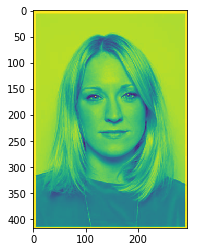

In [180]:
plt.imshow(img1)
plt.show()

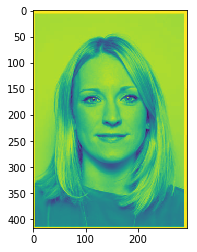

In [181]:
plt.imshow(img2)
plt.show()

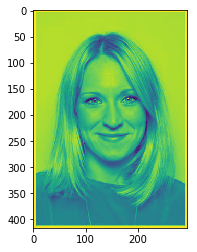

In [182]:
plt.imshow(img3)
plt.show()

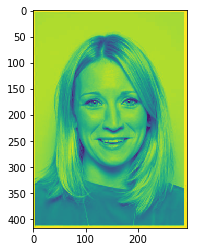

In [183]:
plt.imshow(img4)
plt.show()

In [184]:
# iimg1 = io.imread('PCA_top_left - 1.jpeg', as_gray=True) #color.rgb2gray(io.imread('PCA_top_left - 1.jpeg'))
# iimg2 = io.imread('PCA_top_right - 2.jpeg', as_gray=True) #color.rgb2gray(io.imread('PCA_top_right - 2.jpeg')) 
# iimg3 = io.imread('PCA_bottom_left - 3.jpeg', as_gray=True) #color.rgb2gray(io.imread('PCA_bottom_left - 3.jpeg'))
# iimg4 = io.imread('PCA_bottom_right - 4.jpeg', as_gray=True)# color.rgb2gray(io.imread('PCA_bottom_right - 4.jpeg'))


###### The images are stored in a numpy array and all are of the shape : (417, 295)

In [185]:
img1.shape == img2.shape ==img3.shape == img4.shape

True

In [186]:
img2.shape

(417, 295)

In [187]:
# used the image_slicer module and it worked great! no cropping required! the command was : a=image_slicer.slice('UK_passport_photo_4.jpg', 4)
# if you print a, you get :
# (<Tile #1 - UK_passport_photo_4_01_01.png>,
#  <Tile #2 - UK_passport_photo_4_01_02.png>,
#  <Tile #3 - UK_passport_photo_4_02_01.png>,
#  <Tile #4 - UK_passport_photo_4_02_02.png>)
#st.text("used the image_slicer module and it worked great! no cropping required! the command was : a=image_slicer.slice('UK_passport_photo_4.jpg', 4)")

In [188]:
type(img1)

numpy.ndarray

###### We can use the numpy ravel function to change the dimensions, that is from a matrix to a long vector of shape (417*295,) = (123015,)

In [189]:
fullvector1 = img1.ravel()
fullvector2 = img2.ravel()
fullvector3 = img3.ravel()
fullvector4 = img4.ravel()

In [190]:
fullvector1.shape    #417*295 = 123015

(123015,)

In [191]:
fullvector1.shape == fullvector2.shape == fullvector3.shape == fullvector4.shape

True

In [192]:
# meanvector1 = fullvector1.mean()
# meanvector2 = fullvector2.mean()
# meanvector3 = fullvector3.mean()
# meanvector4 = fullvector4.mean()
# varvector1 = fullvector1.var()
# varvector2 = fullvector2.var()
# varvector3 = fullvector3.var()
# varvector4 = fullvector4.var()

###### We want to make a matrix with four cols and 123015 rows - features, i.e 4 training samples: img1, img2, img3, img4.

In [193]:
# we want to make a matrix with four cols and 123015 rows - features, i.e 4 training samples: img1, img2, img3, img4.
data=np.array([fullvector1,fullvector2, fullvector3, fullvector4]) 
data = data.T

In [194]:
data.shape

(123015, 4)

In [195]:
data

array([[0.99638392, 0.99607843, 0.9588349 , 0.99693451],
       [0.99638392, 1.        , 0.99805059, 0.99078078],
       [0.99916667, 1.        , 0.99916667, 0.99078078],
       ...,
       [0.99356353, 0.99719451, 1.        , 1.        ],
       [0.98572039, 0.99018471, 1.        , 1.        ],
       [0.99078078, 0.98626314, 1.        , 1.        ]])

###### To convert a numpy array into a tensorflow tensor we have to use tf.convert_to_tensor()  This is essential sometimes, we will not be using it here, however it can be useful for certain tasks.

In [196]:
# 
tensordata =tf.convert_to_tensor(
    data, dtype=None, dtype_hint=None, name=None
)

In [197]:
tensordata.shape

TensorShape([123015, 4])


###### While trying to get the variance -covariance matrix for the data, numpy took a lot of time, that is where Pytorch comes in, to convert numpy array into a Pytorch tensor,  use torch.as_tensor() 

In [198]:
#testnormal = f.normalize(tensordata, p=2, dim=2)

In [199]:
#sigma = np.cov(data)

In [200]:
#sigma.shape

In [201]:
torchtensor = torch.as_tensor(data.T)

In [202]:
type(torchtensor)

torch.Tensor

In [203]:
torchtensor.shape

torch.Size([4, 123015])

###### Here is the effiecient implementation of PCA from Pytorch, we use this with the torch tensor.

In [204]:
U,S,V = torch.pca_lowrank(torchtensor, q=None, center=True, niter=3)

In [114]:
U

tensor([[-0.6472,  0.2525, -0.5171,  0.5000],
        [ 0.3911,  0.6967,  0.3343,  0.5000],
        [-0.3166, -0.4887,  0.6410,  0.5000],
        [ 0.5727, -0.4605, -0.4582,  0.5000]], dtype=torch.float64)

In [205]:
torch.matmul(U, U.T)

tensor([[ 1.0000e+00,  5.5511e-17, -2.7756e-17, -1.3878e-16],
        [ 5.5511e-17,  1.0000e+00,  9.7145e-17,  1.1102e-16],
        [-2.7756e-17,  9.7145e-17,  1.0000e+00,  0.0000e+00],
        [-1.3878e-16,  1.1102e-16,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)

In [206]:
torch.matmul(V.T, V)

tensor([[ 1.0000e+00,  2.1563e-16, -1.4364e-17, -4.8768e-18],
        [ 2.1563e-16,  1.0000e+00,  3.5649e-17,  1.1247e-17],
        [-1.4364e-17,  3.5649e-17,  1.0000e+00, -1.7117e-17],
        [-4.8768e-18,  1.1247e-17, -1.7117e-17,  1.0000e+00]],
       dtype=torch.float64)

In [207]:
S

tensor([3.3262e+01, 2.4947e+01, 1.8995e+01, 3.2861e-14], dtype=torch.float64)

In [ ]:
# The relation of (U, S, V) to PCA is as follows:

# A is a data matrix with m samples and n features

# the V columns represent the principal directions

# S ** 2 / (m - 1) contains the eigenvalues of A.T * A / (m - 1)
# 
# which is the covariance of A when center=True is provided.

# matmul(A, V[:, :k]) projects data to the first k principal components

In [115]:
U.shape

torch.Size([4, 4])

In [116]:
S.shape

torch.Size([4])

In [117]:
V.shape

torch.Size([123015, 4])

In [56]:
#Let K be 100000, lets take the first K Principle components 

#datareduced = torch.matmul(torchtensor)

In [57]:
#matmul(A, V[:, :k]) projects data to the first k principal components

In [58]:
#datareduced

In [59]:
#datareduced.shape

In [60]:
# Let the projection be to the first 10000 components.
# torchtensor.shape == ([4, 123015]) V.shape == torch.Size([123015, 4])

###### We are using the K first important principal components and we can vary K, we wish to project the data into a different dimension.

In [118]:
zresult=torch.matmul(torchtensor.T, V.T[:, :5000])      # here K = 5000  

In [119]:
zresult.shape

torch.Size([123015, 5000])

###### We project back the PCA result to its original dimensions.

In [120]:
xapprox  = torch.matmul(V.T[:, :5000], zresult.T)

In [121]:
xapprox.shape

torch.Size([4, 123015])

In [122]:
xapprox

tensor([[-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0089,  0.0088,  0.0088,  ...,  0.0088,  0.0087,  0.0087],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0015],
        [ 0.0577,  0.0573,  0.0573,  ...,  0.0579,  0.0579,  0.0579]],
       dtype=torch.float64)

###### We separate the samples and reshape the tensors and finally convert them to numpy version to view them as the original image size.

In [123]:
xapprox[0].shape

torch.Size([123015])

In [124]:
xapprox[0].shape==xapprox[1].shape==xapprox[2].shape==xapprox[3].shape

True

In [125]:
#ch1=torch.reshape(xapprox[0], (417, 295))
ch2=torch.reshape(xapprox[1], (417, 295))
# ch3=torch.reshape(xapprox[2], (417, 295))
# ch4=torch.reshape(xapprox[3], (417, 295))

In [111]:
#ch1numpy = ch1.numpy()
ch2numpy = ch2.numpy()
# ch3numpy = ch3.numpy()
# ch4numpy = ch4.numpy()# 

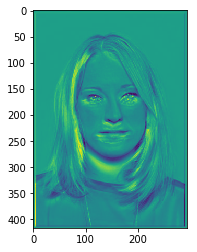

In [91]:
plt.imshow(ch1numpy)
plt.show()
#Various values of K are below: 

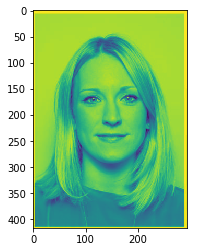

In [126]:
plt.imshow(ch2numpy)
plt.show()


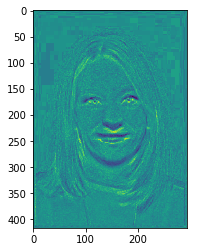

In [159]:
plt.imshow(ch3numpy)
plt.show()

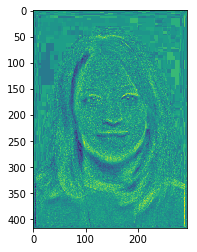

In [160]:
plt.imshow(ch4numpy)
plt.show()